# Capacitated vehicle routing problem(CVRP)

C, conjunto de clientes

vertices, conjunto de vértices, onde 0 representa a origm $N = \{ 0 \} \cap C$

arcos, conjunto de todas os arcos entre cada vértice, $A = \{ (i,j) \in N \timez N \ : \ i \not= j \}$

$q_i$, volume de cada pedido dos clientes

Q, capacidade dos veiculos

- variáveis

$
x_{ij} =
\left\{
\begin{array}{rl}
1, & \mbox{ se o arco } (i,j) \mbox{ é ativo} \\
0, & caso contrário.
\end{array}
\right.
$

$u_i$, capacidade de $i \in C$

In [1]:
# bibliotecas
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt

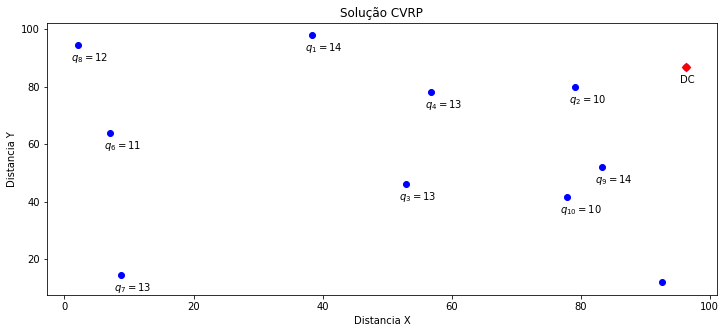

In [9]:
# vértices
n = 11
clientes = [i for i in range(n) if i!=0]
vertices = [0] + clientes
arcos = [(i,j) for i in vertices for j in vertices if i!=j]

# demanda
np.random.seed(0)
q = {n: np.random.randint(10,15) for n in clientes}
q[0] = 0
Q = 50

# coordenadas
X = np.random.rand(len(vertices)) * 100
Y = np.random.rand(len(vertices)) * 100

# distâncias
distancia = {
    (i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in vertices for j in vertices if i!=j
}

# print grafo
plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

# DC
plt.scatter(X[0],Y[0],color='red',marker='D')
plt.annotate("DC",(X[0]-1,Y[0]-5.5))

for i in clientes:
    plt.annotate('$q_{%d}=%d$' %(i,q[i]),(X[i]-1,Y[i]-5.5))

plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Solução CVRP")
plt.show()

In [12]:
# modelo 

# criando modelo
model = Model("CVRP")

# variáveis
x = model.addVars(arcos, vtype = GRB.BINARY, name = 'x')
u = model.addVars(clientes, ub=Q, vtype = GRB.CONTINUOUS, name = 'u')

# função objetivo
model.setObjective(quicksum(distancia[i,j] * x[i,j] for i,j in arcos), GRB.MINIMIZE)

# restrições
model.addConstrs(quicksum(x[i,j] for j in vertices if j!=i) == 1 for i in clientes)
model.addConstrs(quicksum(x[i,j] for i in vertices if i!=j) == 1 for j in clientes)
model.addConstrs((x[i,j] == 1) >> (u[i]+q[j] == u[j]) for i,j in arcos if j!=0 and i!=0)
model.addConstrs(u[i] >= q[i] for i in clientes)
model.addConstrs(u[i] <= Q for i in clientes)

# paramentros
model.Params.timeLimit = 60
model.Params.MIPGap = 0.1

# resolvendo o problema
model.optimize()




Changed value of parameter timeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x03dad3a8
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 1e+02]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 5e+01]
Presolve added 179 rows and 12 columns
Presolve time: 0.01s
Presolved: 219 rows, 132 columns, 1324 nonzeros
Variable types: 42 continuous, 90 integer (90 binary)

Root relaxation: objective 3.465773e+02, 52 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | 

In [15]:
# print soluções
print("valor ótimo: ", str(round(model.objVal,2)))
for v in model.getVars():
    if v.x > 0.9:
        print(str(v.VarName)+"="+str(v.x))

valor ótimo:  565.99
x[0,4]=1.0
x[0,7]=1.0
x[0,9]=1.0
x[1,0]=1.0
x[2,0]=1.0
x[3,0]=1.0
x[4,2]=1.0
x[5,3]=1.0
x[6,8]=1.0
x[7,6]=1.0
x[8,1]=1.0
x[9,10]=1.0
x[10,5]=1.0
u[1]=50.0
u[2]=22.999999999999694
u[3]=50.0
u[4]=13.0
u[5]=37.000000000000234
u[6]=23.99999999999968
u[7]=13.0
u[8]=36.00000000000029
u[9]=14.0
u[10]=24.000000000000256


In [17]:
# grafico da solução
rotas = list()
for i in clientes:
    if x[(0,i)].x > 0.9:
        aux = [0,i]
        while i!=0:
            j=i
            for k in vertices:
                if j!=k and x[(j,k)].x > 0.9:
                    aux.append(k)
                    i = k
        rotas.append(aux)
rotas

[[0, 4, 2, 0], [0, 7, 6, 8, 1, 0], [0, 9, 10, 5, 3, 0]]

In [18]:
Color = { 
    0 : 'blue',
    1 : 'orange',
    2 : 'green',
    3 : 'red',
    4 : 'purple',
    5 : 'brown',
    6 : 'pink',
    7 : 'gray',
    8 : 'olive',
    9 : 'cyan',
    10 : 'yellow',
    11 : 'violet',
    12 : 'lime',
    13 : 'azure',
    14 : 'gold',
    15 : 'tan'
}

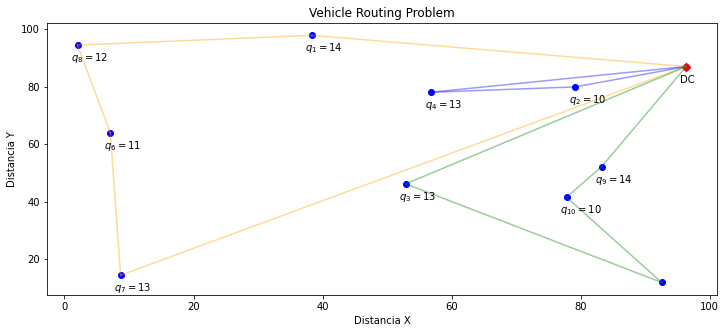

In [25]:
#print grafo
plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

# DC
plt.scatter(X[0],Y[0],color='red',marker='D')
plt.annotate("DC",(X[0]-1,Y[0]-5.5))

for i in clientes:
    plt.annotate('$q_{%d}=%d$' %(i,q[i]),(X[i]-1,Y[i]-5.5))
    
# print rotas
for r in range(len(rotas)):
    for n in range(len(rotas[r])-1):
        i = rotas[r][n]
        j = rotas[r][n+1]
        plt.plot([X[i],X[j]],[Y[i],Y[j]],color=Color[r], alpha=0.4)
        
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Vehicle Routing Problem")
plt.show()